In [69]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/koueihei/Project-for-math-data-skills-YG/main/Data_and_code/MacroData.csv')
data = data.assign(Dates=pd.to_datetime(data.Dates)).set_index('Dates')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6252 entries, 2002-01-11 to 2022-01-10
Data columns (total 22 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Average daily coal consumption                       3916 non-null   float64
 1   Operating rate of blast furnaces                     475 non-null    float64
 2   All-steel wheel operating rate                       414 non-null    float64
 3   Semi-steel wheel operating rate                      410 non-null    float64
 4   Polyester filament operating rate                    508 non-null    float64
 5   PTA operating rate                                   413 non-null    float64
 6   Average daily output of crude steel                  459 non-null    float64
 7   Commercial housing transaction area of 30 cities(D)  4392 non-null   float64
 8   Commercial housing transaction area of 30 cities(W

In [13]:
keys = ('s1','s2','s3','s4','s5','s6','s7','d1','d2','d3','d4','d5','d6','d7','p1','p2','p3','s8','s9','s10','s11','s12')
indexing = dict(zip(data.columns.to_list(),keys))
indexing

{'Average daily coal consumption': 's1',
 'Operating rate of blast furnaces': 's2',
 'All-steel wheel operating rate': 's3',
 'Semi-steel wheel operating rate': 's4',
 'Polyester filament operating rate': 's5',
 'PTA operating rate': 's6',
 'Average daily output of crude steel': 's7',
 'Commercial housing transaction area of 30 cities(D)': 'd1',
 'Commercial housing transaction area of 30 cities(W)': 'd2',
 'Cement Price Index': 'd3',
 'Average Daily Sales of Passenger Car(Wholesale)': 'd4',
 'Average Daily Sales of Passenger Car(Retail)': 'd5',
 'Keqiao Textile Price Index': 'd6',
 'CCFI composite index': 'd7',
 'Edible Agricultural Products Price Index': 'p1',
 'Production price index': 'p2',
 'WTI spot price': 'p3',
 'Output: Rebar': 's8',
 'Output:Wire Rod': 's9',
 'Output:Hot Rolled Coil': 's10',
 'Output: Cold Rolled Coil': 's11',
 'Output: Plate': 's12'}

In [20]:
data1 = data.rename(columns = indexing)

data2 = data1.resample('W').mean().loc['2016-01-01':'2021-12-31',:]


In [68]:
checker = data2.isnull().any(axis=0)
checker[checker == 1].index.tolist()

['s1',
 's2',
 's3',
 's4',
 's5',
 's6',
 's7',
 'd3',
 'd4',
 'd5',
 'd6',
 'd7',
 'p1',
 'p2',
 'p3',
 's8',
 's9',
 's10',
 's11',
 's12']

In [71]:
pd.DataFrame(data=[1,2,3,4,5,np.nan]).isnull().any()

0    True
dtype: bool

<AxesSubplot:xlabel='Dates'>

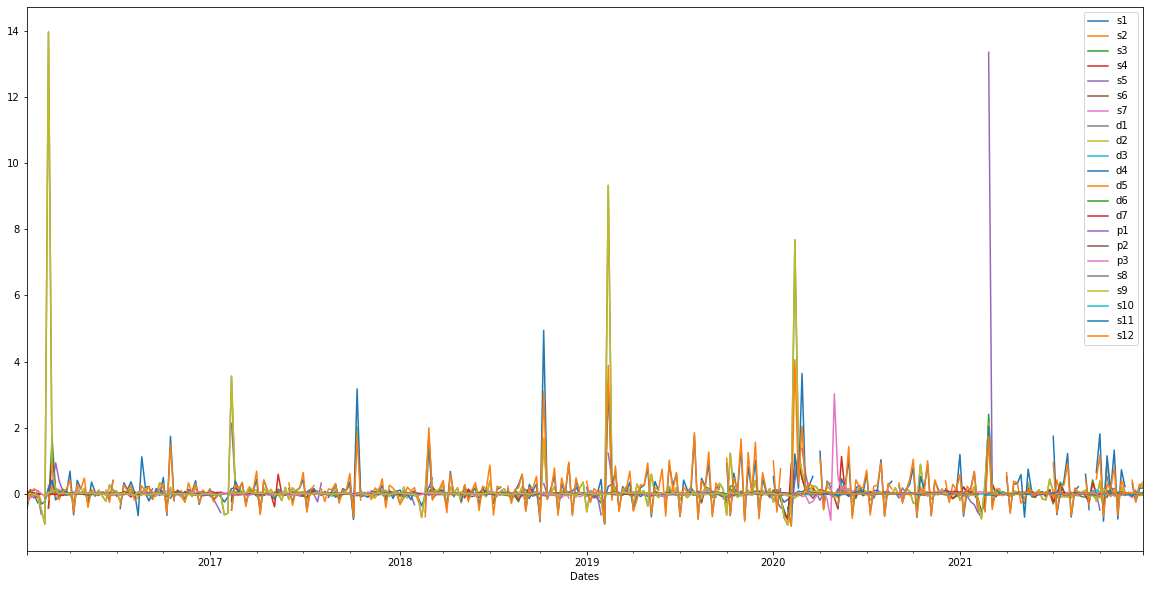

In [75]:
data3 = data2.pct_change().dropna(how='all',axis=0).replace(to_replace=0, value=np.nan)
data3.plot(figsize=(20,10))

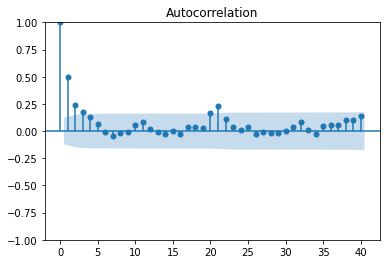

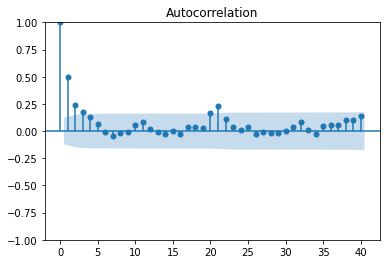

In [82]:
plot_acf(data3.p2.dropna(), lags=40)

In [73]:
def check_nan(data):
    '''
    ckeck if there are any nans in data and drop them.
    input -> pandas dataframe
    return -> data without nan, number of series remained
    '''
    checker = data.isnull().any(axis=0)
    if checker.any()==True:
        columns = checker[checker == 0].index.tolist()
        return data[columns], len(columns)
    else:
        return data, data.shape[1]
